# Testing supervised learning from scikit-learn

Trying to predict antibody avidity based on early transcriptional signatures.
High dimensional data, RNA-seq.


In [178]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Read in the data to a pandas DataFrame using the read_csv method.
test_index = [3,8]

train=pd.read_csv('../data/machine_learning_dataset/fold_changes_RPKMs.csv')
train.loc[train.group == "Neg", 'group'] = 0
train.loc[train.group == "Pos", 'group'] = 1
train['Spike_W6_log10'] = np.log10(train['Spike_W6'])
spike_col=train['Spike_W6_log10']
train.drop(labels=['Spike_W6_log10'], axis=1,inplace = True)
train.insert(0, 'Spike_W6_log10', spike_col)
    
#test=train.iloc[test_index]
train=train.drop(train.index[test_index])


# We are using the train data as placeholder for the test data,
# so we can implement code to run predictions on the test pandas DataFrame as well.
test=train.copy() 
train

,Spike_W6_log10,sample_ID,subject_ID,group,Spike_W6,avidity_classes,A1BG_dose1,A1BG_dose2,A2M_dose1,A2M_dose2,...,ZSWIM5_dose2,ZSWIM7_dose1,ZSWIM7_dose2,ZSWIM8-AS1_dose1,ZSWIM8-AS1_dose2,ZXDA_dose1,ZXDA_dose2,ZYX_dose1,ZYX_dose2,prior_COVID.19
0,0.568500,222-14,222.14,0,3.702541,class1,-0.938161,-0.303003,-0.687346,-0.551431,...,-2.698196,0.964343,-1.557709,0.395534,-2.091239,-0.740540,-1.192505,-0.703969,1.612827,0
1,0.601899,222-2,222.20,0,3.998521,class1,-0.669075,0.309007,-0.009108,-0.470670,...,1.262066,-0.056420,0.213994,0.207834,-0.055847,-0.064124,-0.991309,-1.520553,-1.684161,0
2,0.633819,222-7,222.70,0,4.303477,class2,-0.408948,0.054523,2.864191,-0.285388,...,1.526551,0.058451,-0.199798,-1.895620,2.095713,-2.477863,1.692380,0.655123,0.855714,0
4,0.665475,222-12,222.12,1,4.628869,class2,-1.144653,-0.743222,0.638637,-0.643280,...,-0.271527,0.266331,-1.664259,-1.197889,1.582455,-0.204072,0.945781,0.146130,0.733845,1
5,0.657644,222-18,222.18,1,4.546148,class2,2.614040,0.730644,-0.115901,-0.244544,...,-1.086969,-0.940692,0.737124,-0.005163,0.407684,-0.132775,-0.215357,-0.406471,-0.224013,1
6,0.610960,222-19,222.19,1,4.082821,class1,1.135258,0.955679,-1.195443,-1.030764,...,0.762486,2.215841,0.930144,0.456305,-0.565779,0.098739,1.018252,-0.732817,-0.303002,1
7,0.677384,222-15,222.15,0,4.757559,class2,-0.857644,-1.008723,0.346561,-0.158016,...,1.573777,-0.223539,-1.015569,0.570259,-0.152506,0.840634,0.152697,-1.371049,-0.181153,0
9,0.682479,222-25,222.25,1,4.813704,class2,0.107318,-0.281242,1.002149,0.035139,...,-0.748563,1.469565,-0.817757,-0.355033,0.183282,0.028109,-0.770515,-0.044402,-0.321819,1


## Cross-validation sets

LOOCV will be used
test

## Scaling

Data was already scaled

## Setting up the data for training.
Set up the data by making a numpy matrix of the training data called `X`, numpy vector with the target values `Y`.


In [180]:
from sklearn.model_selection import PredefinedSplit


(size_x,size_y)=train.shape
target_index=size_y-2



#Put the training data in X the .values method returns a numpy matrix of the numbers in the DataFrame.
X=train.iloc[:,6:].values #,0:target_index]

#Create the same for the test (currently this is the same as train just to keep to code running)
X_test=test.iloc[:,6:].values
#print X

#Put the target value in Y
Y=train['Spike_W6_log10'].values
Y_test=test['Spike_W6_log10'].values



## Training Machine Learning Methods
Finally we can train machine learning methods... 

In [181]:
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.kernel_ridge import KernelRidge


LR: -0.040055 (0.018107)
LRR: -0.040265 (0.017757)
LLR: -0.038258 (0.020537)
DTR: -0.052227 (0.017615)
KNN: -0.041592 (0.017314)
CART: -0.045472 (0.025880)
RF: -0.039596 (0.019802)
KERNEL: -1.141692 (0.106388)


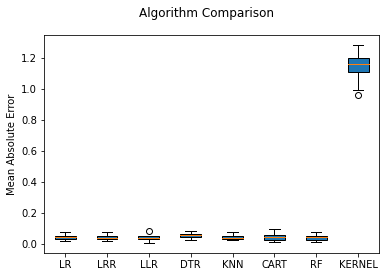

In [186]:
# Prepare configuration for cross validation test harness
seed = 7
# Prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('LRR', Ridge()))
models.append(('LLR', Lasso()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('KERNEL', KernelRidge()))
# Evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
	kfold = model_selection.KFold(n_splits=len(X), random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot([abs(ele) for ele in results],patch_artist=True)
plt.ylabel("Mean Absolute Error")
ax.set_xticklabels(names)
plt.savefig('../results/2022-06-12/ML_methods_test.pdf', bbox_inches='tight')
plt.show()
plt.close()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we